In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [8]:
df = pd.read_csv(r"C:\Users\forgo\Desktop\New folder\BHARTIARTL.NS.csv")
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2017-01-30  296.663422  339.680084  295.745239  317.368347  308.944824   
1     2017-01-31  320.490173  324.116974  314.981079  319.709717  311.224060   
2     2017-02-01  317.689728  321.270599  312.318359  316.863342  308.453217   
3     2017-02-02  316.771545  330.360565  316.082916  324.392426  315.782501   
4     2017-02-03  324.392426  332.380585  323.382416  324.851501  316.229370   
...          ...         ...         ...         ...         ...         ...   
1231  2022-01-21  709.599976  714.000000  689.349976  695.250000  695.250000   
1232  2022-01-24  690.299988  707.000000  677.349976  689.900024  689.900024   
1233  2022-01-25  684.000000  720.450012  682.150024  711.849976  711.849976   
1234  2022-01-27  706.500000  716.000000  701.500000  707.250000  707.250000   
1235  2022-01-28  714.900024  754.000000  701.650024  715.799988  715.799988   

        Volume  
0     22812737  
1    

In [9]:
df = df['Open'].values
df = df.reshape(-1, 1)

In [10]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [12]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [13]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.fit(x_train, y_train, epochs=25, batch_size=128)
model.save('stock_prediction.h5')

Epoch 1/25
8/8 [==============================] - 4s 516ms/step - loss: 0.0024
Epoch 2/25
8/8 [==============================] - 4s 484ms/step - loss: 0.0024
Epoch 3/25
8/8 [==============================] - 3s 391ms/step - loss: 0.0021
Epoch 4/25
8/8 [==============================] - 3s 387ms/step - loss: 0.0019
Epoch 5/25
8/8 [==============================] - 3s 395ms/step - loss: 0.0021
Epoch 6/25
8/8 [==============================] - 3s 382ms/step - loss: 0.0021
Epoch 7/25
8/8 [==============================] - 3s 375ms/step - loss: 0.0021
Epoch 8/25
8/8 [==============================] - 3s 395ms/step - loss: 0.0019
Epoch 9/25
8/8 [==============================] - 3s 367ms/step - loss: 0.0021
Epoch 10/25
8/8 [==============================] - 3s 407ms/step - loss: 0.0022
Epoch 11/25
8/8 [==============================] - 3s 419ms/step - loss: 0.0022
Epoch 12/25
8/8 [==============================] - 3s 416ms/step - loss: 0.0019
Epoch 13/25
8/8 [==============================] 

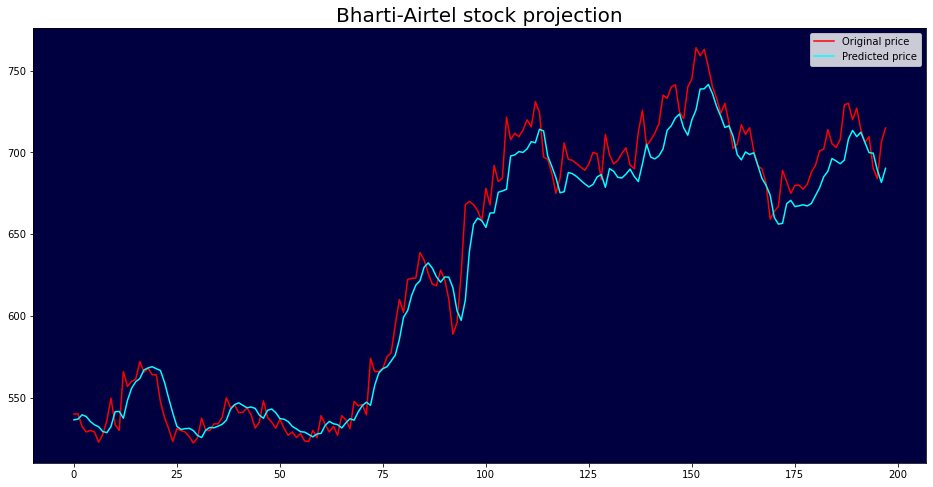

In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.title('Bharti-Airtel stock projection', fontdict = {'fontsize' : 20})
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()